# Latar Belakang Project

COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

# Bermain API

Seperti telah disinggung sebelumnya, dalam proyek ini Anda akan menggunakan data yang disediakan di portal covid19.go.id. Adapun cara untuk mengambil data dari portal tersebut secara langsung adalah dengan menggunakan Application Programming Interface (API). Secara sederhana API dapat dipahami sebagai cara komputer untuk berkomunikasi dengan komputer lainnya sehingga dapat terjadi transaksi pertukaran data.

# Mengakses API covid.go.id

Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di https://data.covid19.go.id/public/api/update.json.

Salah satu cara untuk mengakses API adalah dengan menggunakan fungsi GET() dari paket httr.

Sekarang aktifkanlah paket httr dan jalankan fungsi GET() pada alamat API yang telah disebutkan! Simpan hasil fungsi tersebut dalam obyek bernama resp.

In [3]:
library(httr)

resp <- GET ("https://data.covid19.go.id/public/api/update.json")

NameError: name 'library' is not defined

# Mengevaluasi Respon

Saat Anda menjalankan fungsi GET(), pada dasarnya hal yang terjadi adalah Anda membuat sebuah permintaan kepada server penyedia API. Permintaan Anda tersebut selanjutnya diproses dan dijawab oleh server sebagai sebuah respon. Objek resp yang telah Anda buat memiliki informasi respon oleh server.

Ada tiga informasi utama dalam sebuah respon API, yaitu status, headers, dan body. Status memiliki informasi apakah permintaan Anda berhasil atau tidak dan dinyatakan dalam status code, headers umumnya mengandung informasi metadata, sedangkan body berisikan konten atas permintaan yang telah dibuat.

# Status Code

Ada beberapa jenis status code yang umumnya dijumpai, antara lain:

        1. 200 Artinya permintaan sukses dipenuhi.
        2. 404 Artinya berkas yang diminta tidak dapat ditemukan.
        3. 403 Artinya akses permintaan ditolak.
        4. 500 Artinya terjadi kesalahan pada server.

Informasi lengkap mengenai jenis-jenis status code dapat diakses melalui :

https://restfulapi.net/http-status-codes/

Anda dapat menggunakan fungsi status_code() untuk mengetahui status atas permintaan Anda melalui API. Sekarang coba lihatlah status atas permintaan yang telah Anda buat! Apakah permintaan Anda berhasil?

In [ ]:
library(httr)

resp <- GET("https://data.covid19.go.id/public/api/update.json")
status_code (resp)

# Status Code - 2

Selain menggunakan fungsi status_code(), Anda juga dapat mengetahui status permintaan dengan cara mengakses elemen dari resp. Status code tersebut tersedia dengan nama status_code dan dapat diakses dengan menggunakan operator $ pada obyek resp. Cobalah kembali akses status code dengan cara tersebut dan bandingkan hasilnya dengan cara pertama!

In [ ]:
library(httr)

resp <- GET("https://data.covid19.go.id/public/api/update.json")
resp$status_code
identical(resp$status_code, status_code(resp))

# Headers API

Selamat status permintaan Anda melalui API sukses dipenuhi! Sekarang cobalah Anda jalankan fungsi headers() pada resp untuk mengetahui metadata apa saja yang tersimpan. Apakah isi dari elemen content-type? Kapan terakhir kali informasi diperbaharui?

In [ ]:
library(httr)

resp <- GET("https://data.covid19.go.id/public/api/update.json")
headers(resp)

# Mengekstrak isi Respon

Respon API dengan status code 200 menyatakan bahwa permintaan Anda berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak. Selain itu Anda juga telah mengetahui lewat fungsi headers() bahwa konten yang diminta tersedia dalam bentuk application/json, yaitu berkas JSON.

Selanjutnya Anda dapat mengekstrak konten tersebut dengan menggunakan fungsi content(). Fungsi content() tersebut secara cerdas akan menyesuaikan output sesuai dengan jenis berkas yang tersedia, dalam hal ini adalah berkas JSON. Jalankan fungsi tersebut pada obyek resp dan tambahkan argumen as = "parsed" dan simplifyVector = TRUE. Simpanlah hasilnya sebagai cov_id_raw!

In [ ]:
library(httr)
resp <- GET("https://data.covid19.go.id/public/api/update.json")
cov_id_raw <- content(resp, as = "parsed", simplifyVector = TRUE)

# Mengekstrak isi Respon - Pt 2

Dengan menggunakan fungsi length() dan names() cobalah amati ada berapa komponen serta apa saja nama komponen dalam obyek cov_id_raw tersebut! Kemudian ekstraklah komponen ke-2 dan simpan dengan nama cov_id_update.

In [ ]:
length(cov_id_raw)

names(cov_id_raw)

cov_id_update <- cov_id_raw$update

# Analisa Data

Sekarang Anda diminta untuk fokus pada obyek cov_id_update untuk menjawab pertanyaan-pertanyaan berikut:

    Kapan tanggal pembaharuan data penambahan kasus?
    Berapa jumlah penambahan kasus sembuh?
    Berapa jumlah penambahan kasus meninggal?
    Berapa jumlah total kasus positif hingga saat ini?
    Berapa jumlah total kasus meninggal hingga saat ini?

Notes :
Sahabat Data DQLab dapat membagikan jawaban pada bagian ini melalui instagram dan tag ke akun @dqlab 

In [ ]:
lapply(cov_id_update, names)

cov_id_update$penambahan$tanggal

cov_id_update$penambahan$jumlah_sembuh

cov_id_update$penambahan$jumlah_meninggal

cov_id_update$total$jumlah_positif

cov_id_update$total$jumlah_meninggal

# Lawan COVID-19!

Jumlah masyarakat yang terinfeksi dan meninggal akibat COVID-19 sudah sangat banyak! Kita harus waspada namun tetap tenang dalam menghadapi masa pandemi ini. Masih ingatkah Anda apa 3 langkah sederhana melawan COVID-19? Cuci tangan, pakai masker, dan jaga jarak.

# Apa Kabar Jawa Barat?

Anda telah berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia dengan menggunakan data yang langsung diambil menggunakan API. Namun bagaimana jika Anda ingin berfokus dengan data COVID-19 di provinsi tempat menetap saat ini?

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai contoh data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json dan dapat diakses menggunakan baris kode berikut:

resp_jabar <- GET("https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json")
cov_jabar_raw <- content(resp_jabar, as = "parsed", simplifyVector = TRUE)

Sekarang jalankanlah fungsi names() pada cov_jabar_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

    Berapa jumlah total kasus COVID-19 di Jawa Barat?
    Berapa persentase kematian akibat COVID-19 di Jawa Barat?
    Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?


In [ ]:
library(httr)

resp_jabar <- GET("https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json")
cov_jabar_raw <- content(resp_jabar, as = "parsed", simplifyVector = TRUE)

names(cov_jabar_raw)

cov_jabar_raw$kasus_total

cov_jabar_raw$meninggal_persen

cov_jabar_raw$sembuh_persen

# Memperoleh Informasi yang Lebih Lengkap

Informasi umum mengenai COVID-19 di Jawa Barat telah Anda dapatkan. Namun informasi akan lebih lengkap jika Anda memiliki data perkembangan COVID-19 dari waktu ke waktu, apakah Anda setuju?

Kabar baiknya adalah informasi tersebut juga disediakan oleh covid19.go.id melalui permintaan API yang telah Anda buat sebelumnya. Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. Silakan Anda ekstrak data tersebut dari cov_jabar_raw dan simpanlah hasilnya sebagai obyek bernama cov_jabar! Amati struktur cov_jabar menggunakan fungsi str() dan head().

In [ ]:
cov_jabar <- cov_jabar_raw$list_perkembangan
str(cov_jabar)

head(cov_jabar)

# Menjinakkan Data

Setelah mengekstrak dan mengamati cov_jabar, Anda menemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Sekarang Anda akan mencoba melakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Sebelum itu, silakan Anda aktifkan paket dplyr yang akan dipergunakan untuk melakukan pengolahan data.

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data cov_jabar, yaitu:

    Menghapus kolom “DIRAWAT_OR_ISOLASI” dan “AKUMULASI_DIRAWAT_OR_ISOLASI”
    Menghapus semua kolom yang berisi nilai kumulatif
    Mengganti nama kolom “KASUS” menjadi “kasus_baru”
    Merubah format penulisan kolom berikut menjadi huruf kecil
        kolom MENINGGAL
        kolom SEMBUH
    Memperbaiki data pada kolom tanggal

Lengkapilah baris kode berikut untuk melakukan menjinakan data sesuai dengan tahapan yang telah Anda rencanakan! Anda akan menggunakan operator pipe (%>%) untuk merangkai fungsi menjadi sebuah pipeline. Simpan hasil pengolahan Anda dengan nama new_cov_jabar.

In [ ]:
library(dplyr)

new_cov_jabar <-
  cov_jabar %>% 
  select(-contains("DIRAWAT_OR_ISOLASI")) %>% 
  select(-starts_with("AKUMULASI")) %>% 
  rename(
    kasus_baru = KASUS,
    meninggal = MENINGGAL,
    sembuh = SEMBUH
    ) %>% 
  mutate(
    tanggal = as.POSIXct(tanggal / 1000, origin = "1970-01-01"),
    tanggal = as.Date(tanggal))

str(new_cov_jabar)  

# Menunjukkan Melalui Gambar

Akhirnya Anda berhasil menjinakan data cov_jabar sehingga lebih mudah untuk diolah, selamat! Memiliki data yang rapi memang menyenangkan, apakah Anda setuju dengan hal tersebut?

Setelah memiliki data yang jinak, sekarang saatnya Anda mengekspresikan data tersebut dalam bentuk lain yang harapannya lebih mudah dicerna: grafik. Anda akan memulai merancang visualisasi yang memiliki estetika dengan menggunakan paket ggplot2 dan paket hrbrthemes. Aktifkanlah kedua paket tersebut!

Berikut merupakan templat kode untuk membuat visualisasi menggunakan ggplot2:

ggplot(data = ..., aes(x = ..., y = ...)) +
  geom_xxx()

Berdasarkan templat tersebut, komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (geom_col()), line-chart memerlukan geometri garis (geom_line()), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (geom_bar() atau geom_col()).

Lengkapi baris kode berikut untuk membuat bar-chart jumlah kasus baru harian COVID-19 di Jawa Barat menggunakan data new_cov_jabar! Pergunakan kolom “tanggal” sebagai sumbu-x.

In [ ]:
library(ggplot2)
library(hrbrthemes)

ggplot(new_cov_jabar, aes(x = tanggal, y = kasus_baru)) +
  geom_col()

# Menunjukkan Melalui Gambar - Pt 2

Anda telah berhasil membuat bar-chart yang diminta. Namun grafik tersebut belum memiliki informasi yang jelas serta cenderung membosankan untuk dilihat. Sekarang silakan buat kembali grafik tersebut dengan menggunakan baris kode yang telah dimodifikasi berikut:

In [ ]:
library(ggplot2)
library(hrbrthemes)

ggplot(new_cov_jabar, aes(tanggal, kasus_baru)) +
    geom_col(fill = "salmon") +
    labs(
      x = NULL,
      y = "Jumlah kasus",
      title = "Kasus Harian Positif COVID-19 di Jawa Barat",
      subtitle = "Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung",
      caption = "Sumber data: covid.19.go.id"
    ) +
    theme_ipsum(
      base_size = 13,
      plot_title_size = 21,
      grid = "Y",
      ticks = TRUE
    ) +
    theme(plot.title.position = "plot")

# Grafik untuk Kasus Sembuh

Sekarang buatlah grafik serupa dengan menggunakan data kasus sembuh  Pergunakan warna “olivedrab2” untuk grafik kasus sembuh!

Hasil yang diharapkan adalah sebagai berikut :

In [ ]:
library(ggplot2)
library(hrbrthemes)

ggplot(new_cov_jabar, aes(tanggal, sembuh)) +
  geom_col(fill = "olivedrab2") +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Harian Sembuh Dari COVID-19 di Jawa Barat",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13, 
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

# Grafik untuk Kasus Meninggal

Sekarang buatlah grafik serupa dengan menggunakan data kasus meninggal. Pergunakan warna “darkslategray4” untuk kasus meninggal!

Output yang seharusnya dihasilkan adalah sebagai berikut.

In [ ]:
library(ggplot2)
library(hrbrthemes)

ggplot(new_cov_jabar, aes(tanggal, meninggal)) +
  geom_col(fill = "darkslategray4") +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Harian Meninggal Akibat COVID-19 di Jawa Barat",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13, 
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

# Apakah Pekan ini Lebih Baik?

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

Anda dapat dengan mudah bekerja dengan data tanggal apabila menggunakan paket lubridate. Adapun yang akan digunakan untuk mengekstrak informasi pekan dalam satu tahun adalah fungsi week().

Lengkapilah baris kode berikut untuk menghitung pertambahan kasus pekanan dan simpanlah hasilnya sebagai cov_jabar_pekanan! Anda juga diminta untuk menggunakan fungsi glimpse() dari dplyr untuk melakukan inspeksi data.

In [ ]:
library(dplyr)
library(lubridate)

cov_jabar_pekanan <- new_cov_jabar %>% 
  count(
    tahun = year(tanggal),
    pekan_ke = week(tanggal),
    wt = kasus_baru,
    name = "jumlah"
  )

glimpse(cov_jabar_pekanan)

# Menjawab Pertanyaan

Pertanyaan baru muncul di benak Anda setelah melakukan inspeksi terhadap data cov_jabar_pekanan tersebut: “Apakah pekan ini lebih baik dari pekan kemarin?”.

Demi menjawab hal tersebut Anda melakukan kalkulasi sederhana dengan tahapan berikut:

    Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama “jumlah_pekanlalu”.
    Mengganti nilai NA pada kolom “jumlah_pekanlalu” dengan nilai 0
    Melakukan komparasi antara kolom “jumlah” dengan kolom “jumlah_pekanlalu”. Hasil komparasi ini disimpan dalam kolom baru dengan nama “lebih_baik”, isinya adalah TRUE apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

Lengkapilah baris kode berikut untuk mengerjakan tahapan yang telah Anda rencanakan! Anda akan menggunakan fungsi lag() dari dplyr untuk membuat kolom “jumlah_pekanlalu”. Perhatikan bahwa disini fungsi tersebut dituliskan sebagai dplyr::lag() untuk menghindari konflik dengan fungsi lag() dari paket stats. Inspeksi hasil pekerjaan Anda dengan menggunakan fungsi glimpse()!

In [ ]:
library(dplyr)

cov_jabar_pekanan <-
  cov_jabar_pekanan %>% 
  mutate(
    jumlah_pekanlalu = dplyr::lag(jumlah, 1),
    jumlah_pekanlalu = ifelse(is.na(jumlah_pekanlalu), 0, jumlah_pekanlalu),
    lebih_baik = jumlah < jumlah_pekanlalu
  )

glimpse(cov_jabar_pekanan)

# Membuat Bar Chart

Anda sungguh luar biasa! Dengan menggunakan data hasil perhitungan tersebut maka sekarang Anda dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: “Apakah pekan ini lebih baik?”

In [ ]:
library(ggplot2)
library(hrbrthemes)

ggplot(cov_jabar_pekanan, aes(pekan_ke, jumlah, fill = lebih_baik)) +
  geom_col(show.legend = FALSE) +
  scale_x_continuous(breaks = 9:29, expand = c(0, 0)) +
  scale_fill_manual(values = c("TRUE" = "seagreen3", "FALSE" = "salmon")) +
  labs(
    x = NULL,
    y = "Jumlah kasus",
    title = "Kasus Pekanan Positif COVID-19 di Jawa Barat",
    subtitle = "Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya",
    caption = "Sumber data: covid.19.go.id"
  ) +
  theme_ipsum(
    base_size = 13,
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(plot.title.position = "plot")

# Pola dan Dinamika

Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain di diri Anda: “Hingga saat ini ada berapa kasus yang masih aktif?”. Aktif dalam artian sedang dalam perawatan atau isolasi.

Informasi ini sebenarnya telah disediakan di dalam respon API covid19.go.id yang Anda minta. Namun tidak ada salahnya jika Anda mencoba menghitungnya sendiri, apakah Anda setuju?

Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal. Anda dapat menggunakan fungsi cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik. Lengkapilah baris kode berikut untuk menghitung jumlah akumulasi kasus aktif, kasus sembuh, dan kasus meninggal!

In [ ]:
library(dplyr)

cov_jabar_akumulasi <- 
  new_cov_jabar %>% 
  transmute(
    tanggal,
    akumulasi_aktif = cumsum(kasus_baru) - cumsum(sembuh) - cumsum(meninggal),
    akumulasi_sembuh = cumsum(sembuh),
    akumulasi_meninggal = cumsum(meninggal)
  )

tail(cov_jabar_akumulasi)

# Membuat Line Chart

Sekarang cobalah Anda buat line-chart pola kasus aktif dengan menggunakan fungsi geom_line(). Sebagai pengingat, Anda dapat menggunakan templat kode berikut untuk membuat grafik menggunakan ggplot2():

In [ ]:
library(ggplot2)

ggplot(data = cov_jabar_akumulasi, aes(x = tanggal, y = akumulasi_aktif)) +
  geom_line()

# Kabar Buruk dan Kabar Baik

Sebagai penutup analisis dalam proyek ini Anda diminta untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.

Ada dua pilihan cara yang dapat Anda tempuh untuk membuat grafik tersebut:

1. Menggunakan data cov_jabar_akumulasi, kemudian buat tiga layer geom_line() untuk setiap kolom satu per satu dengan warna garis yang berbeda; atau

2. Melakukan pivot pada data cov_jabar_akumulasi, kemudian buat satu layer geom_line() dengan menggunakan colour aesthetic

Anda akan diminta untuk menempuh cara nomor 2, yaitu dengan cara melakukan pivot pada data terlebih dahulu. Ketik TRUE pada konsol jika Anda setuju!

# Transformasi Data

Anda akan menggunakan fungsi gather() dari paket tidyr untuk mentransformasi data cov_jabar_akumulasi. Data tersebut akan dirubah dari yang semula berformat wide menjadi format long. AKtifkanlah paket tidyr terlebih dahulu dan lengkapilah baris kode berikut untuk melakukan pivot data. Simpan hasil transformasi data tersebut sebagai cov_jabar_akumulasi_pivot! Perhatikan hasil dari fungsi dim() sebelum dan setelah Anda melakukan transformasi data.

In [ ]:
library(dplyr)
library(tidyr)

dim(cov_jabar_akumulasi)

cov_jabar_akumulasi_pivot <- 
  cov_jabar_akumulasi %>% 
  gather(
    key = "kategori",
    value = "jumlah",
    -tanggal
  ) %>% 
  mutate(
    kategori = sub(pattern = "akumulasi_", replacement = "", kategori)
  )

dim(cov_jabar_akumulasi_pivot)

glimpse(cov_jabar_akumulasi_pivot)

# pivot_longer()

Semenjak tidyr versi 1.0.0, Anda disarankan untuk menggunakan fungsi pivot_longer() sebagai pengganti gather() dan pivot_wider() sebagai pengganti spread(). pivot_longer() dan pivot_wider() memiliki fitur yang lebih lengkap dibandingkan gather() dan spread(). Proses transformasi cov_jabar_akumulasi menjadi cov_jabar_akumulasi_pivot dapat dikerjakan dengan menggunakan pivot_longer() sebagai berikut:

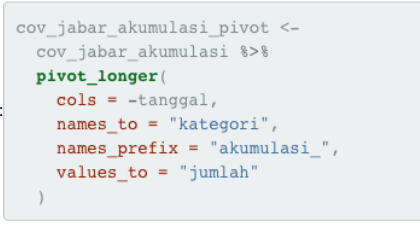

Anda dapat mencoba mempraktekkan potongan coding tersebut pada R Studio pada desktop masing-masing dan apakah Anda menemukan perbedaan signifikan antara baris kode di atas dan baris kode sebelumnya yang Anda gunakan?

# Tahap Terakhir

Anda hampir selesai! Pada tahap terakhir ini Anda cukup salin dan jalankan baris kode berikut di konsol untuk membuat grafik komparasi antara akumulasi kasus aktif, kasus sembuh dan kasus meninggal:

In [ ]:
library(ggplot2)
library(hrbrthemes)

ggplot(cov_jabar_akumulasi_pivot, aes(tanggal, jumlah, colour = (kategori))) +
  geom_line(size = 0.9) +
  scale_y_continuous(sec.axis = dup_axis(name = NULL)) +
  scale_colour_manual(
    values = c(
      "aktif" = "salmon",
      "meninggal" = "darkslategray4",
      "sembuh" = "olivedrab2"
    ),
      labels = c("Aktif", "Meninggal", "Sembuh")
  ) +
    labs(
    x = NULL,
    y = "Jumlah kasus akumulasi",
    colour = NULL,
    title = "Dinamika Kasus COVID-19 di Jawa Barat",
    caption = "Sumber data: covid.19.go.id"
  ) +
    theme_ipsum(
    base_size = 13,
    plot_title_size = 21,
    grid = "Y",
    ticks = TRUE
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    legend.position = "top"
  )

# Kesimpulan dan Komentar

Selamat Anda telah menyelesaikan proyek analisis COVID-19 ini! Anda telah berhasil melakukan impor data melalui API, melakukan transformasi data, serta membuat visualisasi untuk mengkomunikasikan hasil analisis data tentang COVID-19.

Anda dipersilakan untuk selanjutnya mengembangkan analisis dengan cara mengambil studi kasus provinsi lain atau bahkan melakukan komparasi antar provinsi. Anda dapat menggunakan skrip dasar yang tersedia pada tautan ini untuk memulai analisis. Dengan menggunakan studi kasus provinsi pilihan Anda, dapatkah Anda menjawab dua tantangan ini:

    Apakah jumlah kasus di pekan ini lebih rendah dibandingkan pekan kemarin dan dua pekan kemarin secara berturut-turut? Buatlah visualisasinya!

    Salah satu metrik yang dapat dihitung untuk mengamati persebaran COVID-19 di masyarakat adalah ‘Seventh-Day Amplification Factor’ (silakan baca ini dan ini). Dapatkah Anda menghitung metrik tersebut?

Silakan bagikan hasil temuan Anda di LinkedIn atau media sosial dengan tag akun DQLab dan saya ya! Semoga Anda tetap sehat, waspada dan tetap tenang dalam menghadapi pandemi COVID-19. Selamat dan sukses selalu!
